In [2]:
from bisip import mcmcinv

In [5]:
# Second test run
# This time we want to use a Debye decomposition approach
# We also want more control on the inversion

""" 1.
    Model to use ?"""
model = "PDecomp" # polynomial decomposition


""" 2.
    Paths to files ?"""
filepath = "/Users/Charles/Documents/SIP dat files/AVG_SIP-Reciprocals_K389174.dat"

""" 3.
    The data file has many headers and the phase units are mrad"""
skip_rows = 3
units = "mrad"

""" 4.
    Markov Chain Monte Carlo parameters ?"""
mcmc = {"adaptive"   : True,
        "nb_chain"   : 1,
        "nb_iter"    : 500000,
        "nb_burn"    : 400000,
        "thin"       : 1,
        "tune_inter" : 10000,
        "prop_scale" : 1.0,
        "verbose"    : False,
        "cov_inter"  : 10000,
        "cov_delay"  : 50000,
        }
    
# This will start the inversion.
# Note that polynomial order used for the decomposition is 4 and the c exponent is 1.0 (Debye)
# This time the minimal tau value which counts in the total chargeability is given (10^-1)
# We also specify that we do not know the uncertainty of the data and want the 
# inversion process to determine it. This is a good way to check the quality of the data 
# (i.e., if it respects Kramers-Kronig relationships).
sol = mcmcinv(model, filepath, mcmc=mcmc, headers=skip_rows, 
              ph_units=units, decomp_poly=4, c_exp=1.0,
              log_min_tau=-1, guess_noise=True)
sol.fit()
# The inversion class is stored in sol

# This time we make it run for a while (500 000 iterations)


MCMC parameters:
 {'adaptive': True, 'nb_chain': 1, 'nb_iter': 500000, 'nb_burn': 400000, 'thin': 1, 'tune_inter': 10000, 'prop_scale': 1.0, 'verbose': False, 'cov_inter': 10000, 'cov_delay': 50000}

 Chain #1/1
 [-----------------100%-----------------] 500000 of 500000 complete in 61.6 sec

Over 60 seconds! That's not too practical. We run it this long to gather information about the parameters.


Saving fit figure in:
 /Users/Charles/Documents/Github/bisip/Examples//Figures/Fit figures/


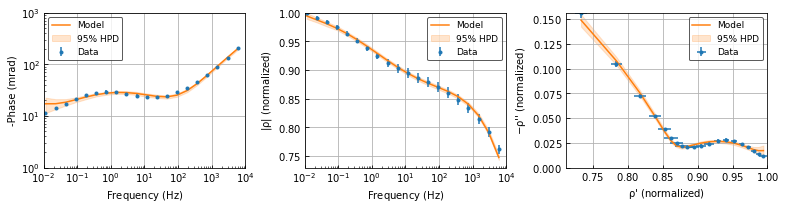

In [22]:
sol.plot_fit(save=True) # See the fit and save it

Looks OK. Since we didn't specify the noise level the inversion process is 
taking some liberties in the low-frequency range.

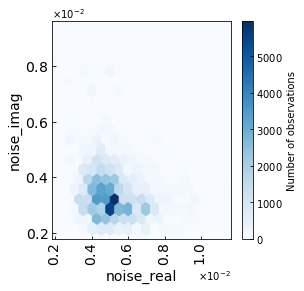

In [28]:
# Let's look at the noise level
sol.plot_hexbin('noise_real','noise_imag')

0.3% noise on the imaginary part of the measurements and 0.5% noise on the real part.

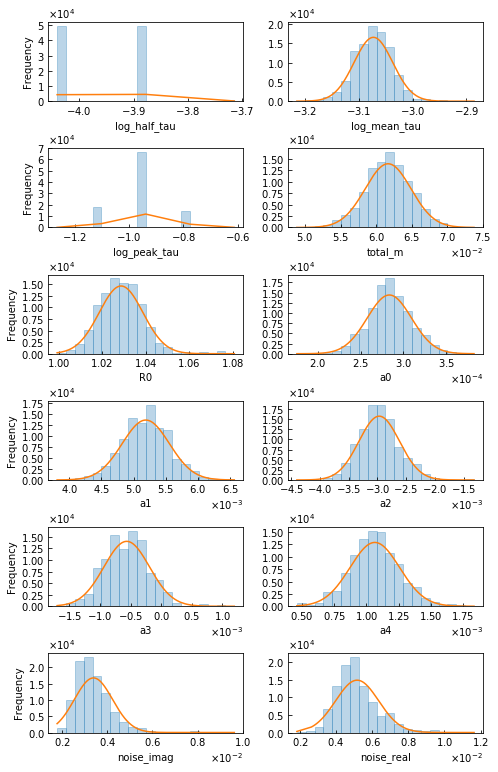

In [29]:
sol.plot_histograms() # See if the traces are stationary

Looking Gaussian-like.


Two or more chains of equal length required for Gelman-Rubin convergence


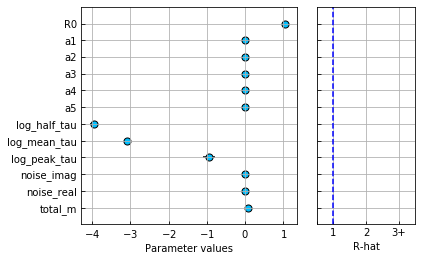

In [36]:
sol.plot_summary() # Visual summary of the stochastic + deterministic variables
# By running more than 2 chains the Gelman-Rubin convergence test is ran and results plotted.
# (Aim for R-hat = 1 for every parameter)

In [6]:
sol.plot_rtd() # To see the RTD

 Note that the total chargeability is only computed between 10^-1 and the end, as specified in `mcmcinv(log_min_tau=-1)`

In [8]:
sol.plot_model_deviance() # See how stable the whole model is

Looks stationary.

In [9]:
sol.save_results() # Save a csv file with results


Saving csv file in:
 /Users/Charles/Documents/Github/bisip/examples//Results/AVG_SIP-Reciprocals_K389174/
